# Assignment 2: K-means clustering {-}

This assignment aims at familiarizing you with training and testing K-means clustering model. You will have to:

- Load the data.
- Analyze the data.
- Use Elbow method to determine the number of clusters K. Research the use of parameters of KElbowVisualizer function.
- Train a K-means clustering model.
- Perform cluster visualization in two ways:
  - Apply PCA to perform dimensionality reduction: project data features into a three-dimensional space and two-dimensional space and visualize the clusters.
  - Visualize the clusters using T-distributed Stochastic Neighbor Embedding (T-SNE). T-SNE is a tool for visualizing high-dimensional data. T-SNE, based on stochastic neighbor embedding, is a nonlinear dimensionality reduction technique to visualize data in a two or three dimensional space. Refernece: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- Take some samples from each cluster and analyze their features to see the clusters' characteristics.


The dataset you will be working on is 'credit-card-holder-data.csv'. It is composed of attributes such as balance of the credit card, ammount of purchase, etc., to develop a customer segmentation model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment2-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment2 (e.g., ML4DS-2012345-Assigment2) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you handle the data for training the K-means model, evaluate the model performance, visualize customer clusters and analyze the cluster characteristics. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Load pandas library
import pandas as pd

In [5]:
# Load dataset in pandas dataframe
data = pd.read_csv("credit-card-holder-data.csv")

In [6]:
# Show several
data.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
data.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

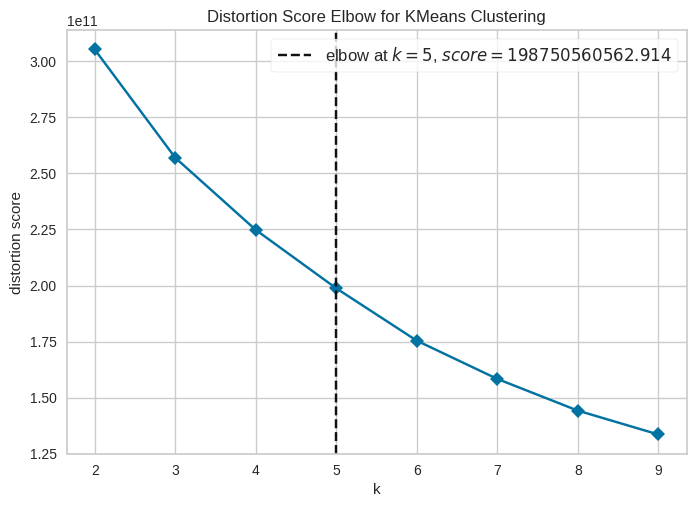

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Selecting features for clustering
X = data.drop(['BALANCE'], axis=1)

model = KMeans()

# Use the elbow method to determine the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

In [10]:
# Based on the elbow method, select the optimal number of clusters (K)
k = 5  # Choose the optimal number of clusters obtained from the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
# Get cluster labels
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


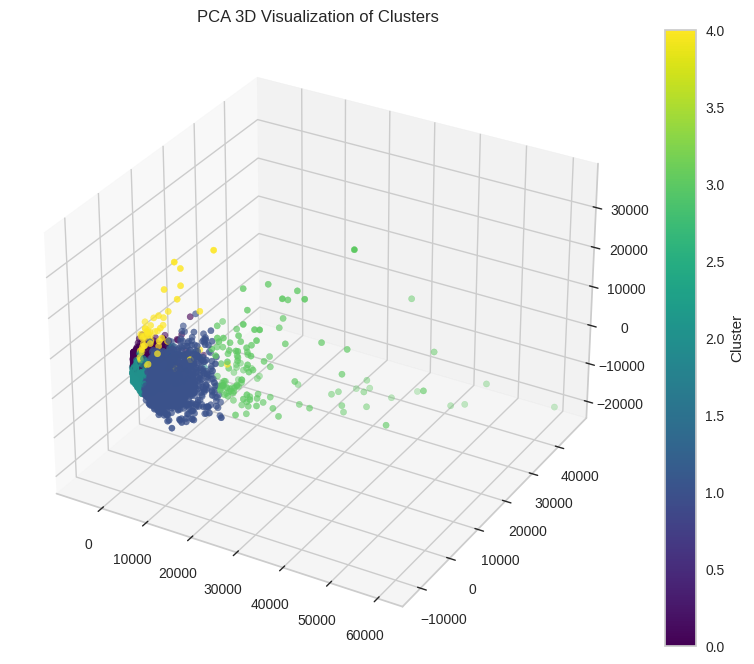

In [13]:
# Visualize clusters in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.title('PCA 3D Visualization of Clusters')
plt.show()

In [14]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

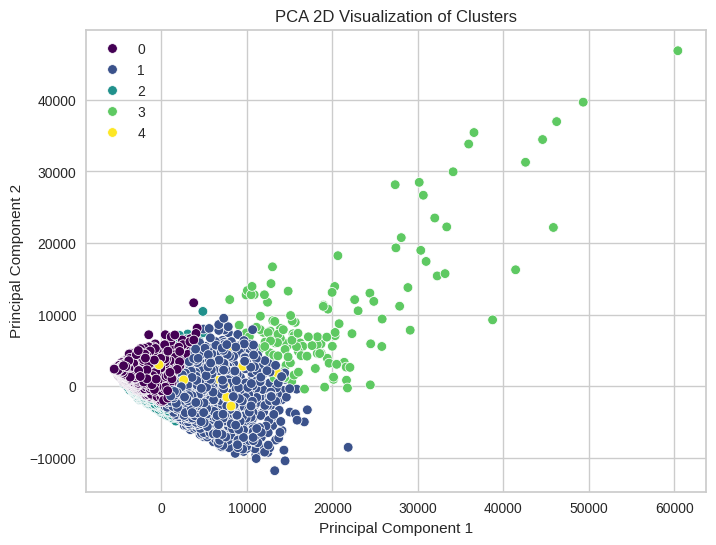

In [15]:
# Visualize clusters in 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=cluster_labels, palette='viridis', legend='full')
plt.title('PCA 2D Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [16]:
from sklearn.manifold import TSNE

# Perform T-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


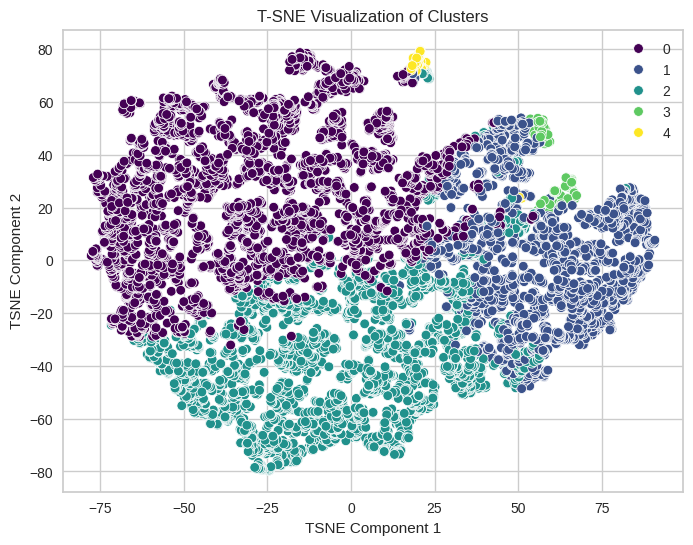

In [17]:
# Visualize clusters using T-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=cluster_labels, palette='viridis', legend='full')
plt.title('T-SNE Visualization of Clusters')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

In [18]:
# Add cluster labels to the original dataframe
data['Cluster'] = cluster_labels


In [19]:
# Take samples from each cluster for analysis
cluster_samples = {}
for cluster_id in range(k):
    cluster_samples[cluster_id] = data[data['Cluster'] == cluster_id].sample(n=5, random_state=42)


In [20]:
# Print samples from each cluster
for cluster_id, samples in cluster_samples.items():
    print(f"Cluster {cluster_id} samples:")
    print(samples)

Cluster 0 samples:
      Unnamed: 0      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8457        8457  4572.797303           1.000000      65.00             65.00   
8593        8593    16.887571           0.363636    1083.00           1083.00   
6637        6637    23.852869           0.363636     123.75            123.75   
8608        8608    21.739563           0.727273     255.60              0.00   
5521        5521   374.101774           1.000000    1283.36           1253.36   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8457                     0.0   5075.019446             0.125000   
8593                     0.0      0.000000             0.250000   
6637                     0.0      0.000000             0.083333   
8608                   255.6      0.000000             0.666667   
5521                    30.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8457                 